In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [3]:
def mc_first_visit_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    First-Visit Monte Carlo Policy Evaluation.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """
    
    def generate_episode(env, policy):
        episode = []
        state = env.reset()
        while True:
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append(state)
            episode.append(action)
            episode.append(reward)
            if done:
                break
            state = next_state
        return episode
        

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    for i in range(1, num_episodes+1):
        # generate new episode
        episode = generate_episode(env, policy)
        states = set() # store unique states
        # for each state appearing in the episode
        for k, j in enumerate(range(0, len(episode), 3)):
            state = episode[j]
            # consider only first occurence of each state
            if state not in states:
                states.add(state)
                returns_count[state] += 1 # increment occurence state over all episodes
                # increment sum of returns
                returns_sum[state] += sum([ discount_factor**(k+1) * episode[x] for x in range(j+2, len(episode), 3) ])
                # update value state by averaging over returns of that state over all episodes
                V[state] = returns_sum[state] / returns_count[state]
    return V

In [4]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

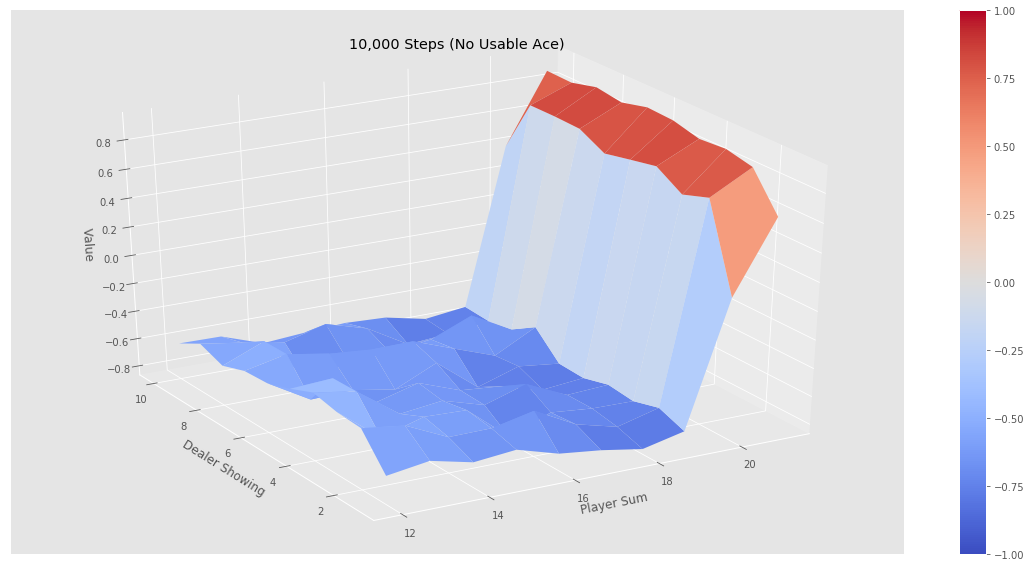

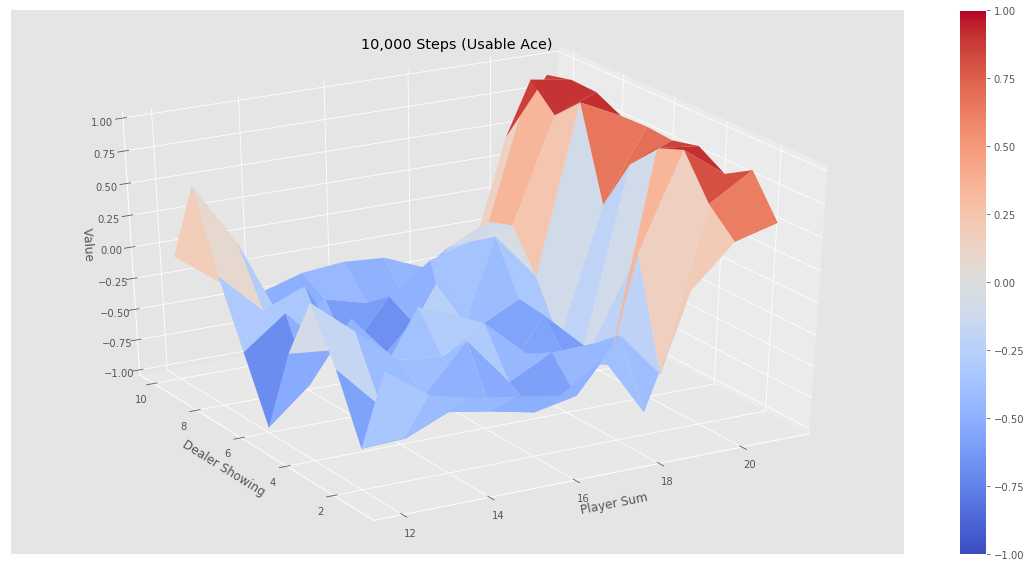

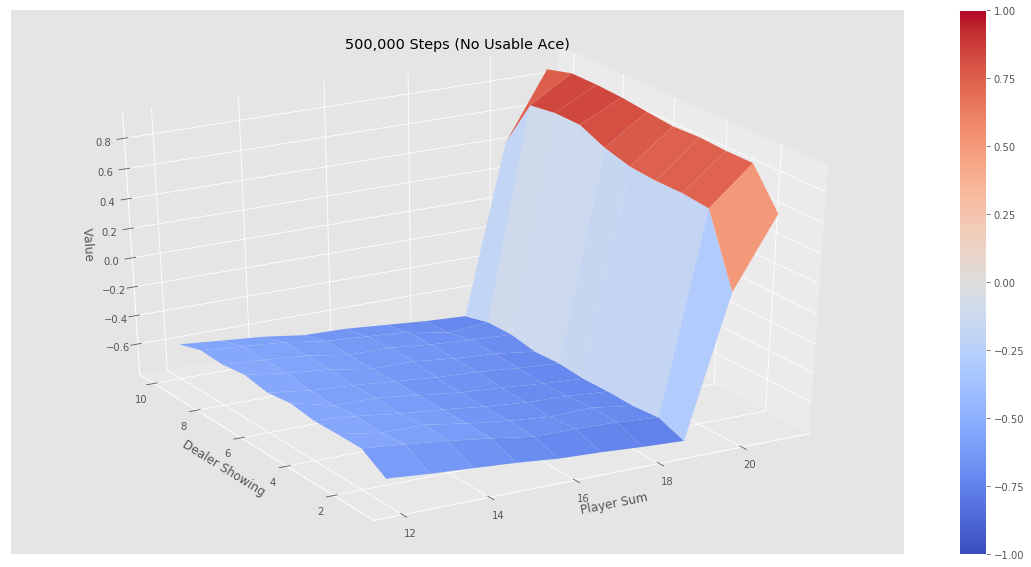

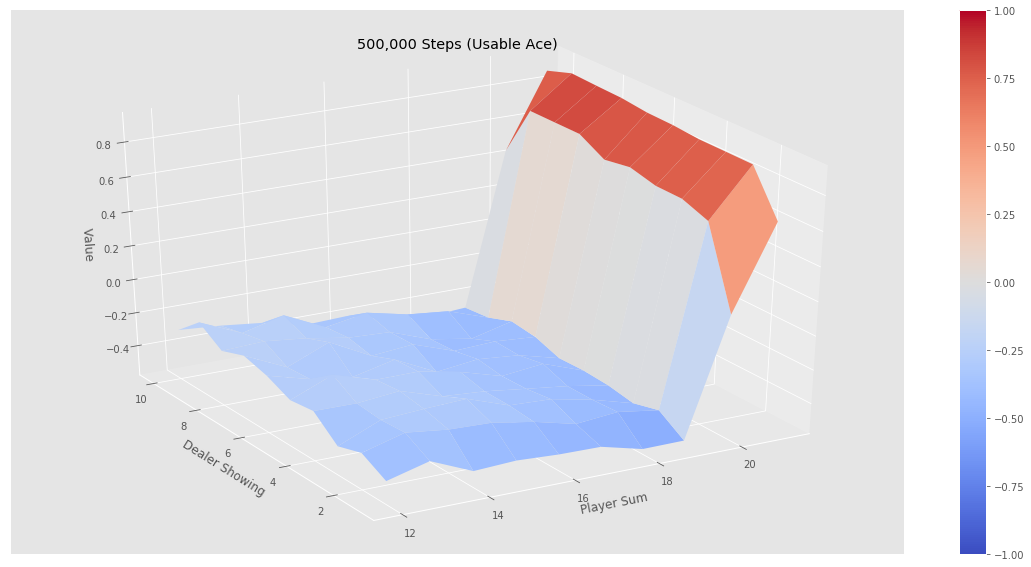

In [5]:
V_10k = mc_first_visit_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_first_visit_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")

### TODO
- Implement Every-Visit Monte-Carlo Updates
- Implement Incremental First-Visit Monte-Carlo Updates
- Implement Incremental Every-Visit Monte-Carlo Updates